Actividad 6
Grupo:006 Hora:Jueves N4

Hannia Soto Zurita 1948211

Edilson Alejandro Hernández López 2109291

José Eduardo Salazar Arellano 2109211

In [1]:
#importar librerias
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Cargo de datos
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Nombres de las clases
class_names = ['zero', 'one', 'two', 'three', 'four',
               'five', 'six', 'seven', 'eight', 'nine']
# Exploración de datos
print("Shape de train_images:", train_images.shape)
print("Número de train_labels:", len(train_labels))
print("Shape de test_images:", test_images.shape)
print("Número de test_labels:", len(test_labels))


Shape de train_images: (60000, 28, 28)
Número de train_labels: 60000
Shape de test_images: (10000, 28, 28)
Número de test_labels: 10000


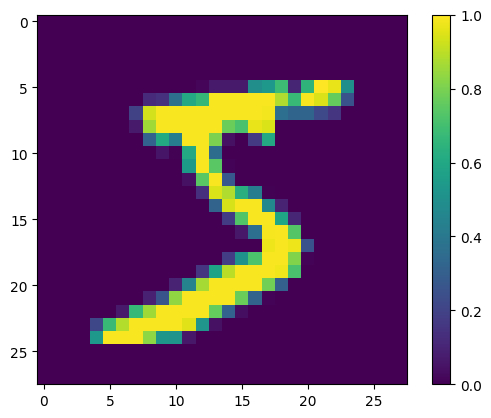

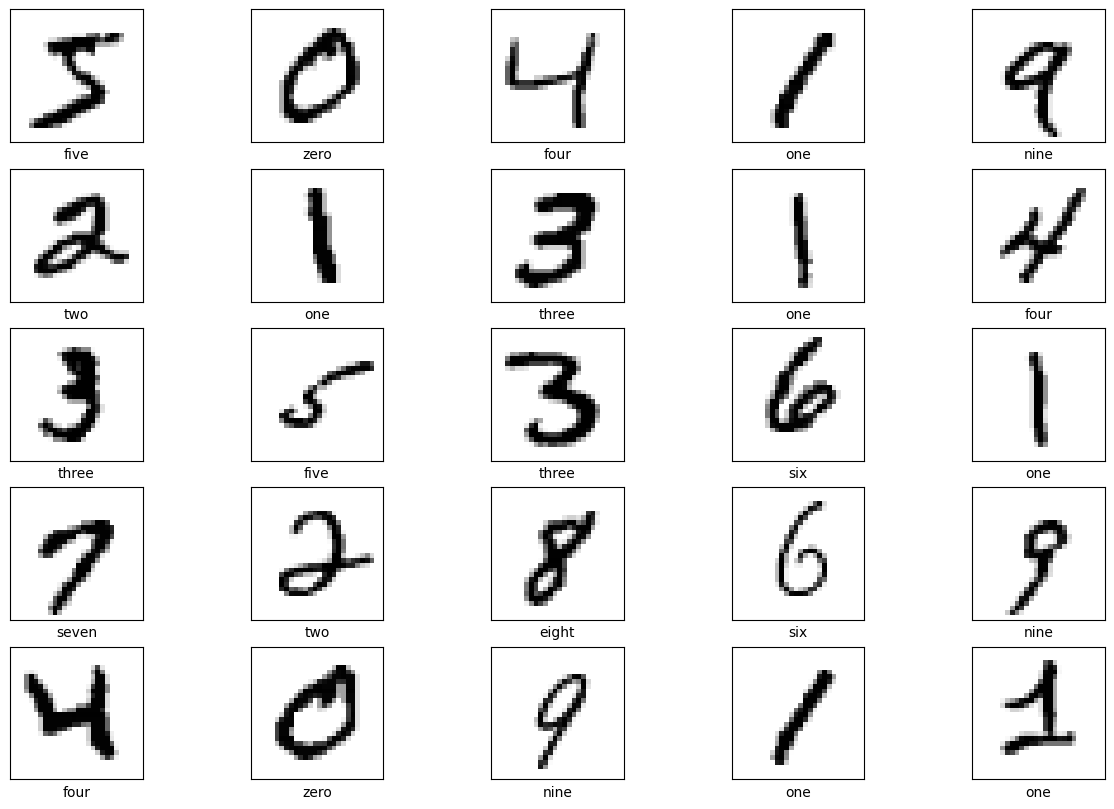

In [ ]:
# Preprocesar los datos
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
# Normalizar las imágenes
train_images = train_images / 255.0
test_images = test_images / 255.0
# Visualizar las primeras 25 imágenes del conjunto de entrenamiento
plt.figure(figsize=(15,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
#Selección y entrenamiento del modelo.
#Crear la base convolucional
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()
#capas densas en la parte superior
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # Capa de salida con 10 unidades
# Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#Entrenamiento del modelo
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))
#Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 5574

313/313 [==============================] - 3s 8ms/step


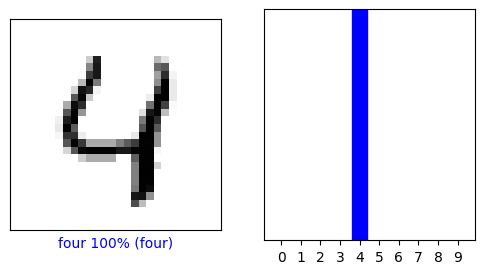

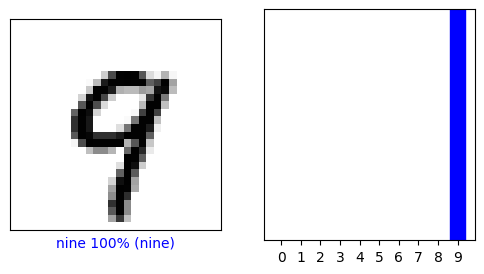

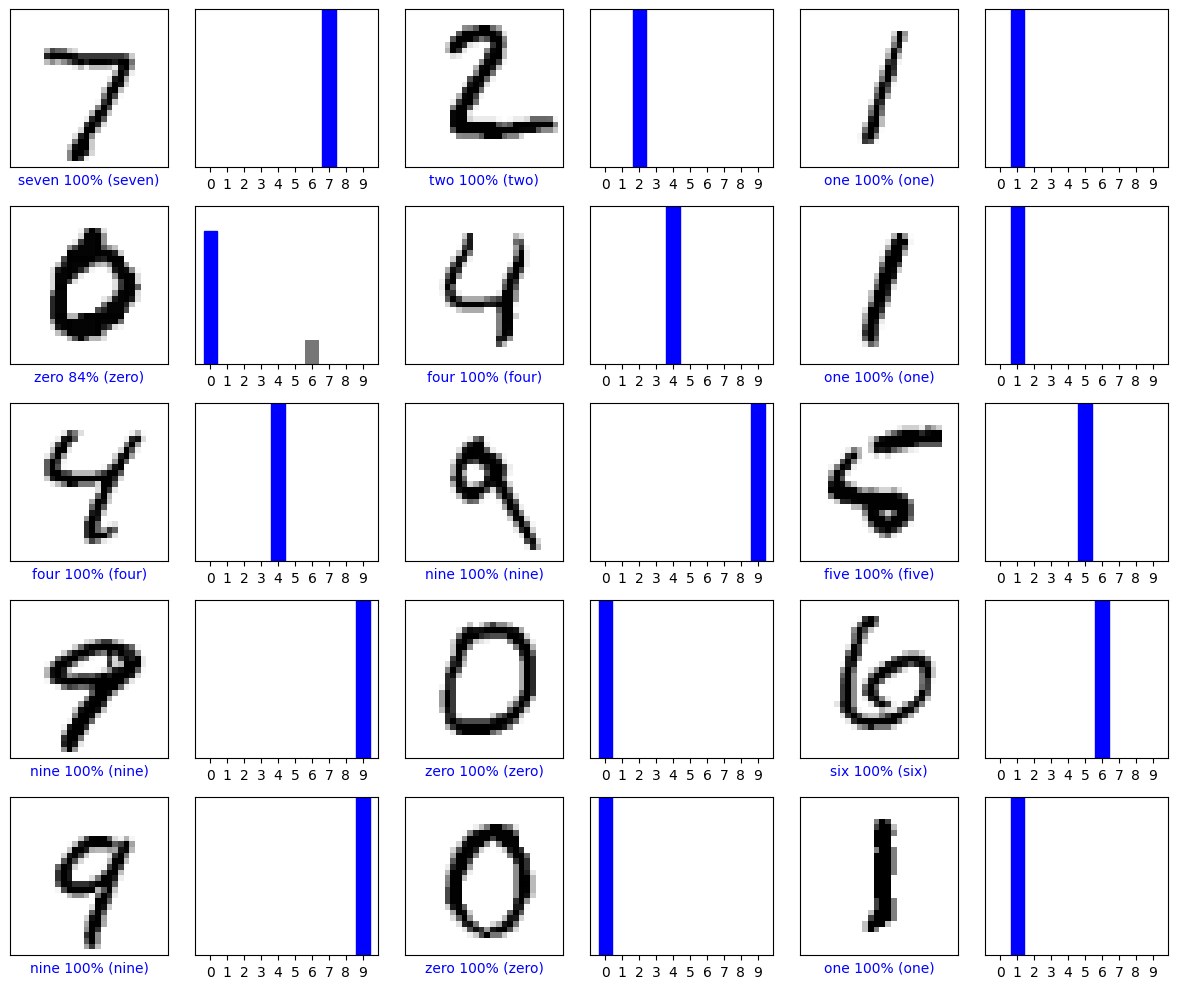

In [ ]:
#predicciones
predictions = model.predict(test_images)
predictions[0]

np.argmax(predictions[0])
test_labels[0]

#gráficas de predicción
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'green'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('green')
  thisplot[true_label].set_color('blue')

  i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

# Tabla de predicciones
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Preguntas
**¿Cuántas épocas usaste para mejorar el rendimiento del modelo en comparación con la red neuronal prealimentada de la actividad 5? ***

Se utilizaron 10 épocas al igual que en la actividad 5.

**¿Obtuviste un mejor rendimiento con este modelo o con el de la actividad 5? ¿Por qué? ***

Pues sí pero no es muy considerable la mejora, ya que es del 1% solamente, creo que se debe a que a pesar de que se mantuvieron las mismas épocas de entrenamiento, también se agregaron más capas que ayudaban a encontrar características que en la prealimentada no se consideran, sin embargo, el entrenamiento de la actividad 5 fue muy bueno que casi iguala a una red convolucional.